In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("/content/sample_data/diabetes_prediction_dataset.csv")
(df.head())


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df = df[df['gender'] != 'Other']
df['gender'] = df['gender'].map({"Female": 20, "Male": 10})
df['smoking_history'].replace({'never': 20, 'No Info': 20, 'current': 40, 'former': 50, 'not current': 60, 'ever': 70}, inplace=True)
df = df.drop_duplicates()
(df.head())

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,20,80.0,0,1,20,25.19,6.6,140,0
1,20,54.0,0,0,20,27.32,6.6,80,0
2,10,28.0,0,0,20,27.32,5.7,158,0
3,20,36.0,0,0,40,23.45,5.0,155,0
4,10,76.0,1,1,40,20.14,4.8,155,0


In [ ]:
# Split the dataset into features and target variable
X = df.drop(columns=['diabetes'])
y = df['diabetes']
print(X.shape)
print(y.shape)

(94149, 8)
(94149,)


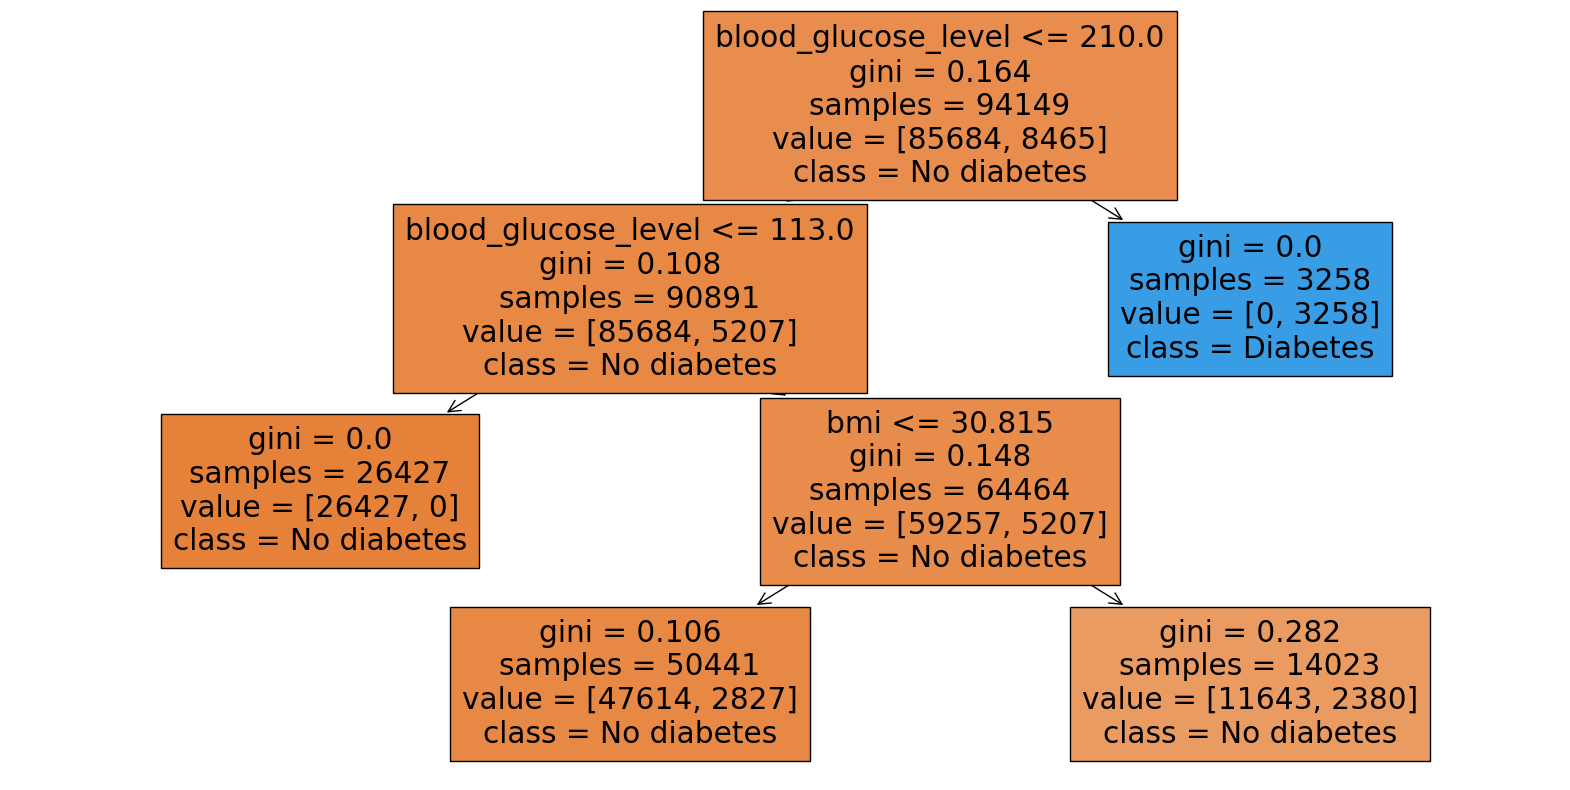

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X_sample = df[['bmi', 'blood_glucose_level']]
y_sample = df['diabetes']

# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_sample, y_sample)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['bmi', 'blood_glucose_level'], class_names=["No diabetes", "Diabetes"], filled=True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75319, 8)
(75319,)
(18830, 8)
(18830,)


In [ ]:
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model.fit(X_train,y_train)
print(model.get_depth())

38


In [ ]:
# Training Accuracy is how well your model fits the data it was trained on.
print("Training Accuracy:", model.score(X_train, y_train))
#Test Accuracy is how well your model performs on new, unseen data (the test set).
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.9990042353191094
Test Accuracy: 0.9477429633563462


In [ ]:
# Adjusting Tree Depth
for d in range (2,18) :
    model = DecisionTreeClassifier(max_depth=d)

    scores = cross_val_score(model, X_train, y_train, cv=5)
#     print(scores

    # Model Accuracy, how often is the classifier correct?
    print("Depth: ", d, "Accuracy:", scores.mean())
#best value of all is the depth

Depth:  2 Accuracy: 0.9701934332873977
Depth:  3 Accuracy: 0.9701934332873977
Depth:  4 Accuracy: 0.9701934332873977
Depth:  5 Accuracy: 0.9701934332873977
Depth:  6 Accuracy: 0.9701934332873977
Depth:  7 Accuracy: 0.9700739431121456
Depth:  8 Accuracy: 0.9698615196595612
Depth:  9 Accuracy: 0.9696889174512895
Depth:  10 Accuracy: 0.9695694272760372
Depth:  11 Accuracy: 0.9692906115786524
Depth:  12 Accuracy: 0.9687462621584848
Depth:  13 Accuracy: 0.967816883551819
Depth:  14 Accuracy: 0.9664759144536829
Depth:  15 Accuracy: 0.9649889150291735
Depth:  16 Accuracy: 0.9636612305498706
Depth:  17 Accuracy: 0.9618290425742065


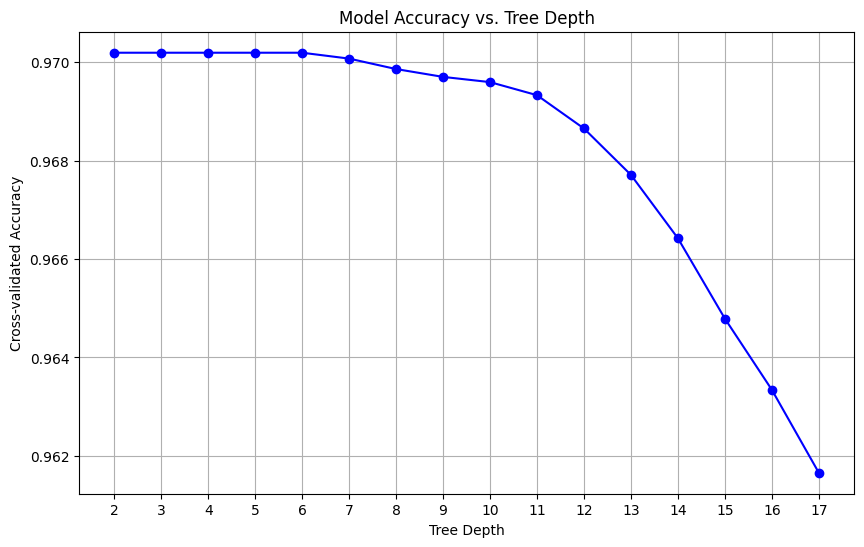

In [ ]:
import matplotlib.pyplot as plt

# Given depths and corresponding accuracies
depths = list(range(2, 18))
accuracies = [
    0.9701934332873977, 0.9701934332873977, 0.9701934332873977,
    0.9701934332873977, 0.9701934332873977, 0.9700739431121456,
    0.9698615196595612, 0.9697021941374286, 0.9695959815297259,
    0.9693304433998907, 0.9686533235926896, 0.9677106691812956,
    0.9664228085905368, 0.9647897603300339, 0.9633425865568895,
    0.9616564394845243
]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Cross-validated Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth=2, random_state=1)
model.fit(X_train,y_train)

print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.970193443885341
Test Accuracy: 0.9702071163037705


In [ ]:
model = DecisionTreeClassifier(max_depth=2, random_state=1)
model.fit(X_train,y_train)

# Predict on the training data
y_train_pred = model.predict(X_train)

# Calculate various metrics for training data
# Calculating CV score using cross_val_score
train_cv_score = cross_val_score(model, X_train, y_train, cv=5)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Print the metrics for training data
print('Decision Tree Training results:')
print('  Accuracy:', train_accuracy)
print('  Precision:', train_precision)
print('  Recall:', train_recall)
print('  F1 Score:', train_f1)
print('  ROC AUC Score:', train_roc_auc)
print('  CV Score:', train_cv_score)


# Predict on the test data
y_pred = model.predict(X_test)
test_cv_score = cross_val_score(model, X_test, y_test, cv=5)

# Calculate various metrics for test data
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics for test data
print('Decision Tree Test results:')
print('  Accuracy:', test_accuracy)
print('  Precision:', test_precision)
print('  Recall:', test_recall)
print('  F1 Score:', test_f1)
print('  ROC AUC Score:', test_roc_auc)
print('  CV Score:', test_cv_score)


Decision Tree Training results:
  Accuracy: 0.970193443885341
  Precision: 1.0
  Recall: 0.6684878913171884
  F1 Score: 0.8013098504292416
  ROC AUC Score: 0.8342439456585942
  CV Score: [0.97052576 0.96972916 0.97085767 0.97045937 0.96939521]
Decision Tree Test results:
  Accuracy: 0.9702071163037705
  Precision: 1.0
  Recall: 0.6686355581807443
  F1 Score: 0.8014159292035398
  ROC AUC Score: 0.8343177790903722
  CV Score: [0.96946362 0.97344663 0.97211896 0.96866702 0.96733935]


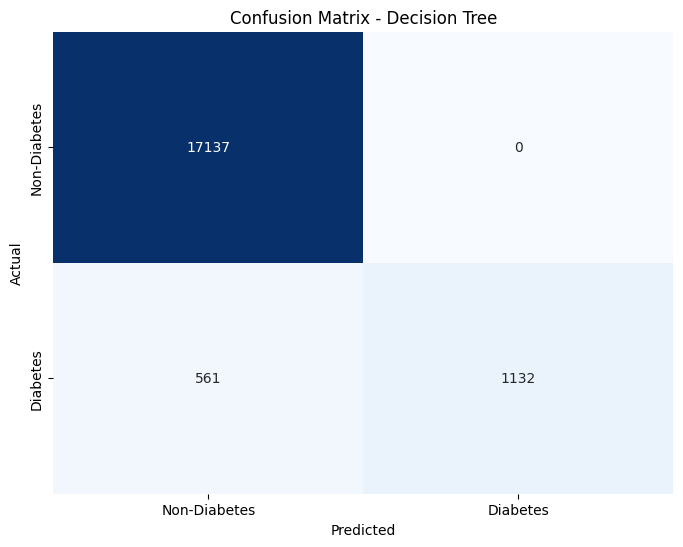

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on the test data
y_pred = model.predict(X_test)

# Generate the confusion matrix using the true labels and the predictions
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetes', 'Diabetes'],
            yticklabels=['Non-Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']


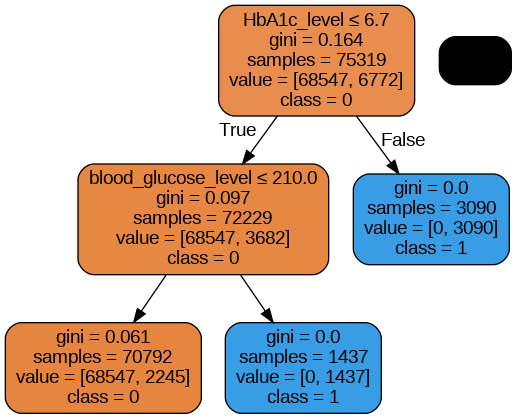

In [ ]:
feature_names = X.columns.tolist()
print(feature_names)
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('plots/decision_tree_titanic_survivors_dtree_fixed_depth.png')
Image(graph.create_png())